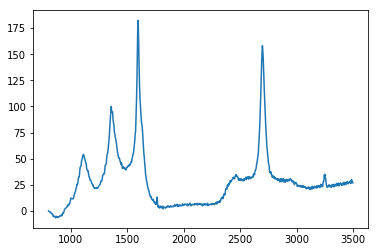

How many peaks will be fitted? 6
What is the approx center of the peak? 1100
What is the approx peak span? 100


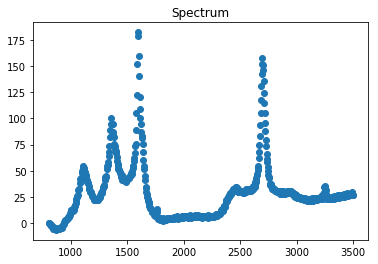

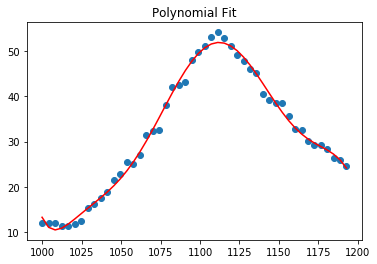

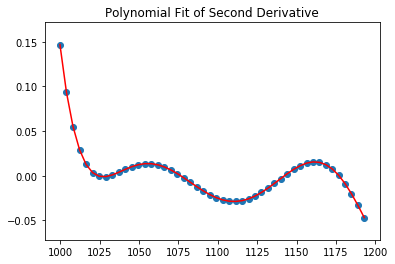

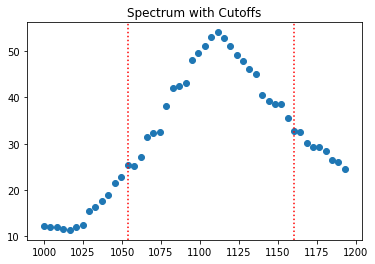

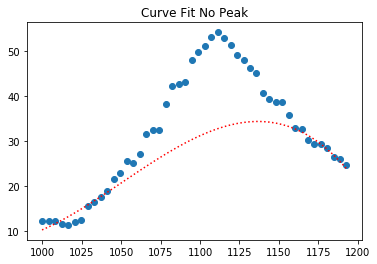

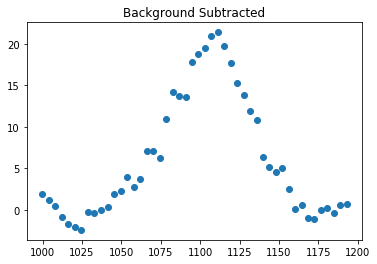

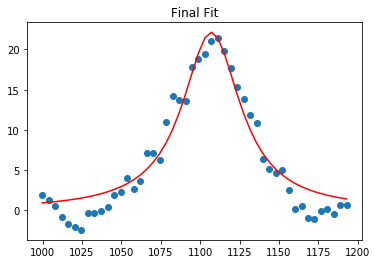

Peak Center: 1107.0904889929227
FWHM: 22.13925337516862
Peak Height: 44.81985388316336

What is the approx center of the peak? 1355
What is the approx peak span? 100


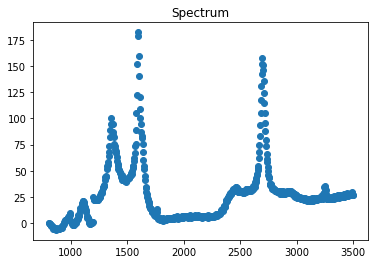

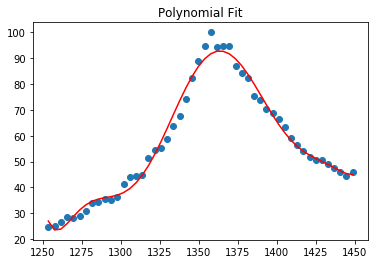

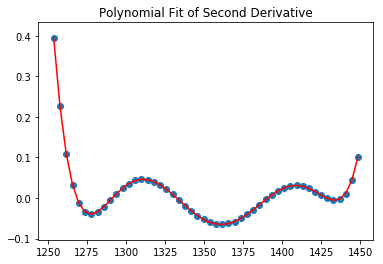

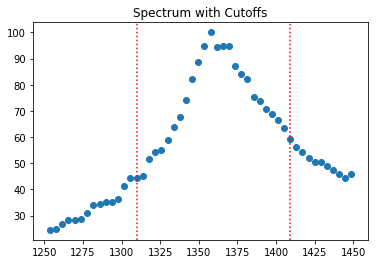

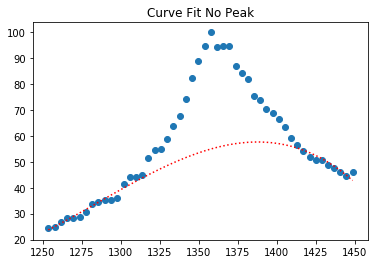

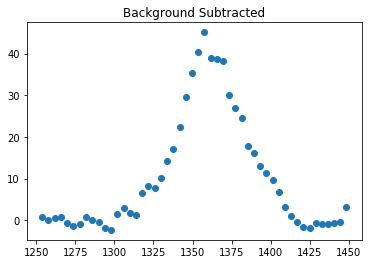

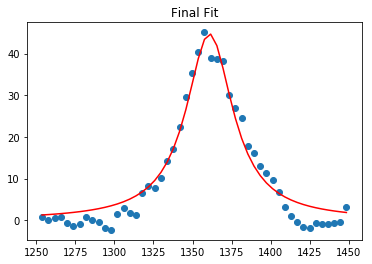

Peak Center: 1360.8653581016408
FWHM: 44.740873308429805
Peak Height: 36.52926380872045

What is the approx center of the peak? 1590
What is the approx peak span? 100


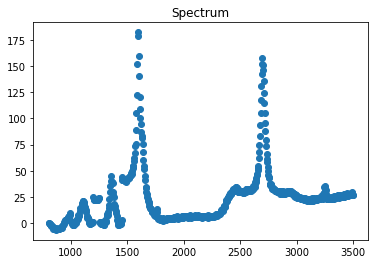

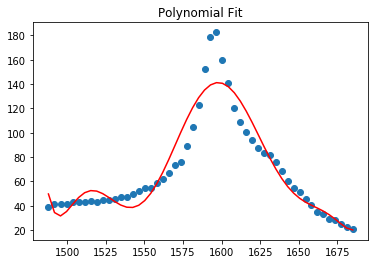

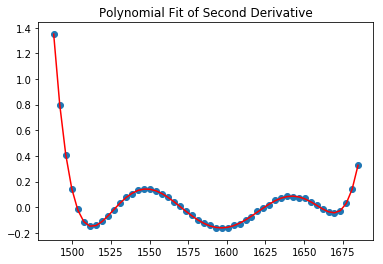

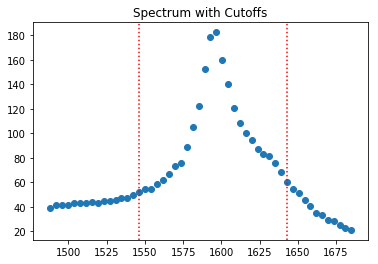

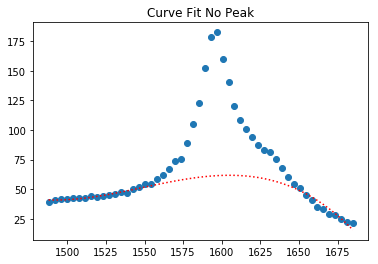

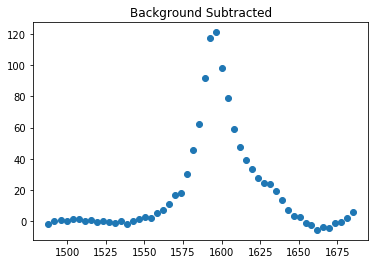

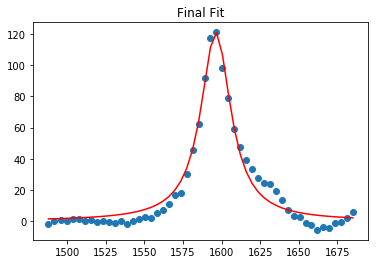

Peak Center: 1596.2372559816686
FWHM: 121.05867072971624
Peak Height: 23.472059986833546

What is the approx center of the peak? 2450
What is the approx peak span? 200


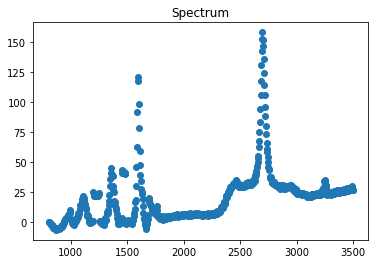

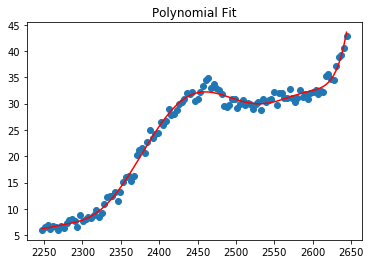

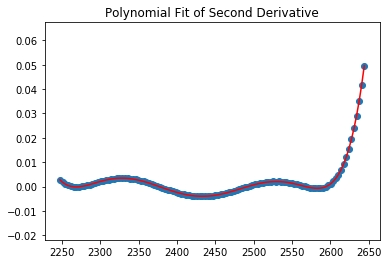

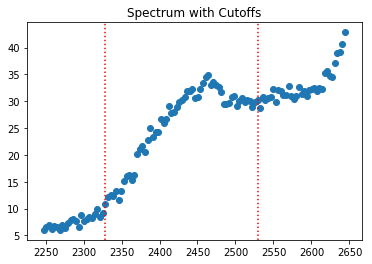

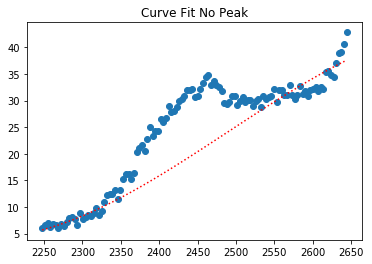

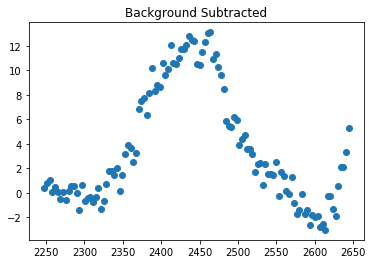

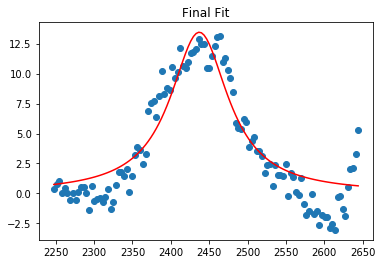

Peak Center: 2437.1485818357164
FWHM: 13.451739526009497
Peak Height: 92.00130333770167

What is the approx center of the peak? 2690
What is the approx peak span? 100


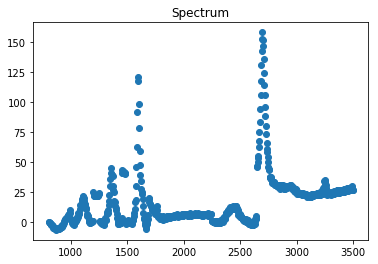

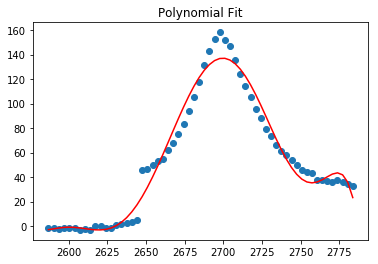

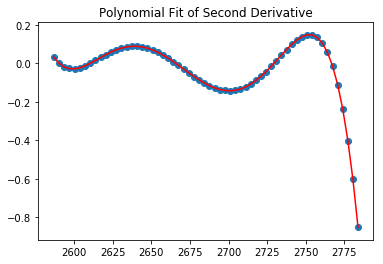

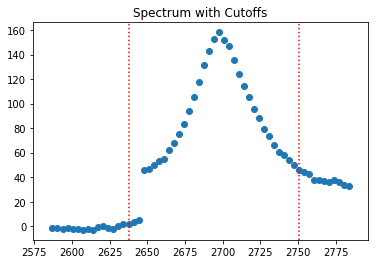

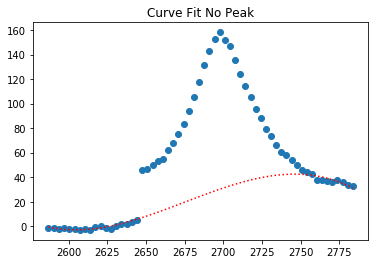

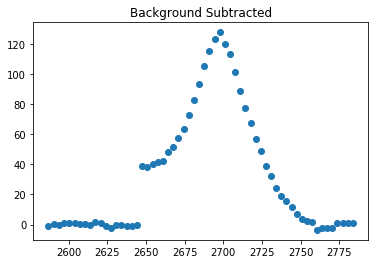

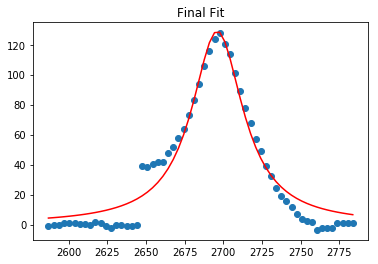

Peak Center: 2696.117925569634
FWHM: 129.03205705388146
Peak Height: 40.575411031987684

What is the approx center of the peak? 3250
What is the approx peak span? 100


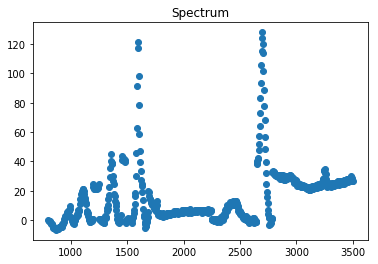

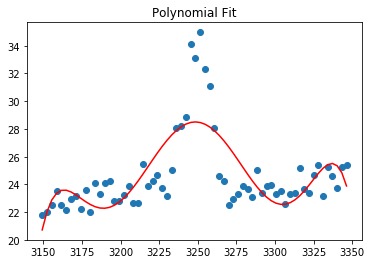

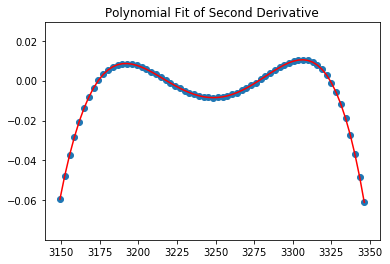

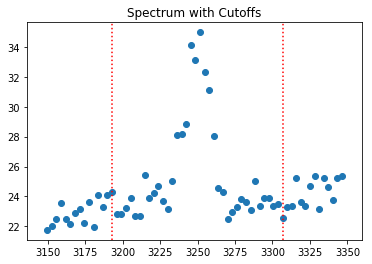

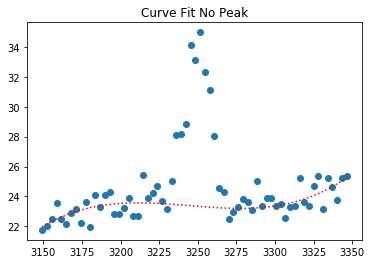

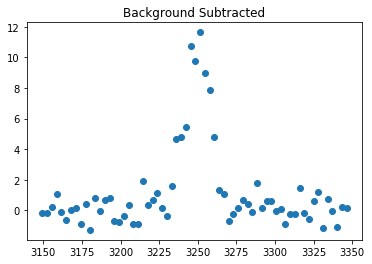

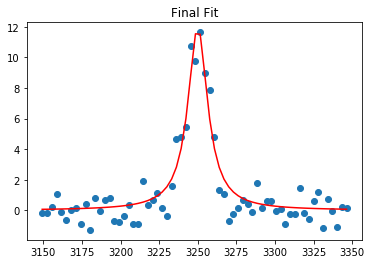

Peak Center: 3250.01782010827
FWHM: 11.98612279317217
Peak Height: 15.368219822064495



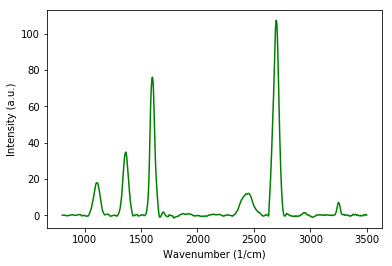

In [11]:
import numpy as np; import matplotlib.pyplot as plt; import warnings
warnings.simplefilter('ignore', np.RankWarning)

# BACKGROUND SUBTRACTION
# Fits a polynomial over the peak. Uses the local maxima of the second 
# derivative of that polynomial to determine the cutoff points for the peak itself. Fits another polynomial to 
# the data that excludes the peak, and subtracts that background polynomial from the spectrum data to 
# give final peak. Then fits final peak to a Lorentz function to give amplitude, peak center, and FWHM info

%run bkg_fit.ipynb
%matplotlib inline

def moving_average(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# Load spectrum
path='/Users/ajcjake/Desktop/Technique Paper/Raman Data/'; samp='6_8_gr_glass_A_v1';
a=np.genfromtxt(path+samp+'.txt',delimiter="\t");
# Split spectrum into x and y data. Subtract background offset. Eliminate negative x data
x=a[2:,0]; y=a[2:,1]-a[2,1];
idx1=np.argmax(x>800); idx2=np.argmax(x>3500); x=x[idx1:idx2]; y=y[idx1:idx2]-y[idx1]; 
# Reference plot
plt.plot(x,y); plt.show();

# Ask for number of times to repeat curve fitting process
n=int(input('How many peaks will be fitted? '));

# Initialize arrays for fitted and fixed y data
sum_fitted_ydata=np.zeros_like(x); sum_fixed_ydata=y

# For each peak: ask for the approx. center, complete background subtraction and curve fitting, and obtain FWHM,
# amplitude (height), and center. Plot fixed and fitted y data
for i in range(0,n):
    center=int(input('What is the approx center of the peak? '))
    span=int(input('What is the approx peak span? '))
    full_width,height,peak_center,sum_fitted_ydata,sum_fixed_ydata=bkg_fit_with_plots(x,y,center,span,sum_fitted_ydata,
                                                                                      sum_fixed_ydata);
    #full_width,height,peak_center,sum_fitted_ydata,sum_fixed_ydata=bkg_fit(x,y,center,sum_fitted_ydata,sum_fixed_ydata);
    # returns FWHM, height, peak center, and fitted peak y data
    print('Peak Center: '+str(peak_center));
    print('FWHM: '+str(full_width));
    print('Peak Height: '+str(height)+'\n');
    #plt.plot(x, sum_fixed_ydata);
    #plt.plot(x, sum_fitted_ydata, '-r');
    #plt.show();

# After fitting each peak, fit remaining non-peak data to a polynomial and subtract to get rid of background
# Find indices of non-peak data points using fitted ydata. Use indices to extract non-peak fixed y data 
# (which equals y data)
idx=np.where(sum_fitted_ydata<= 0); y_no_peak_bkg=sum_fixed_ydata[idx];
# Establish non=peak x data also using indices
x_bkg=x[idx];
# Fit non-peak x and y data to a polynomial using 3 degrees. Tell Python it's a polynomial. 
# Subtract polynomial from fixed y data
f=np.polyfit(x_bkg,y_no_peak_bkg,32); bkg_no_peak_poly = np.poly1d(f);
fixed_no_peak_bkg=y_no_peak_bkg-bkg_no_peak_poly(x_bkg);

# Use a moving average, as defined above, to smooth out noise in between curves
#sum_fixed_ydata[idx] = moving_average(fixed_no_peak_bkg,10)
sum_fixed_ydata[idx]=fixed_no_peak_bkg;

# Redefine original x and y. Somehow code overwrites these after fitting process in a way I'll fix later
y=a[:,1]-a[1,1]; y=y[idx1:];
sum_fixed_ydata=moving_average(sum_fixed_ydata,10);

#plt.plot(x, y);
#plt.plot(x, sum_fitted_ydata, '-r');
plt.plot(x, sum_fixed_ydata, '-g');
plt.xlabel('Wavenumber (1/cm)');
plt.ylabel('Intensity (a.u.)');
#plt.legend(('Raw data', 'Fitted data', 'Data post background substraction'));
plt.show();

file=path+samp+'_fixed.csv';
temp=np.zeros((x.shape[0],2)); temp[:,0]=x; temp[:,1]=sum_fixed_ydata;
np.savetxt(file,temp,delimiter=',');

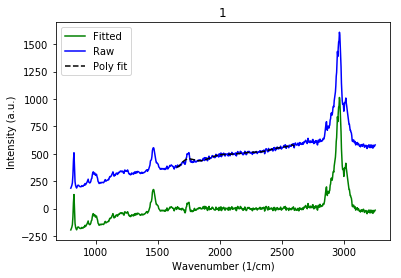

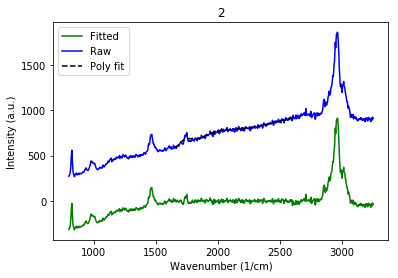

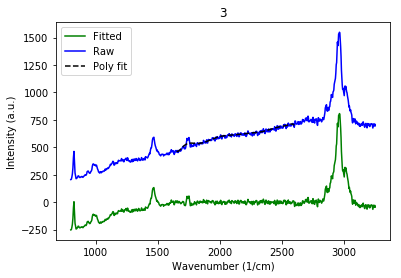

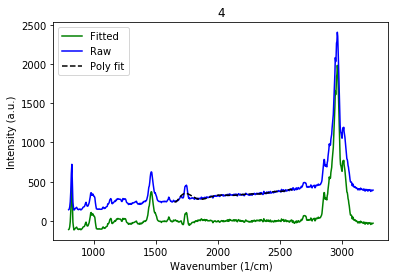

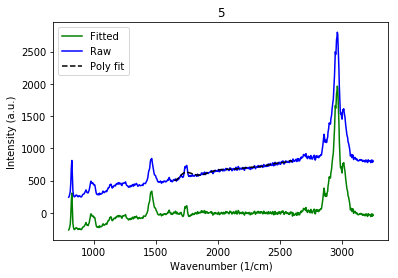

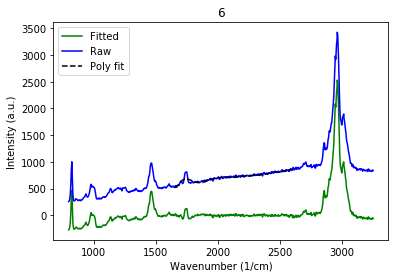

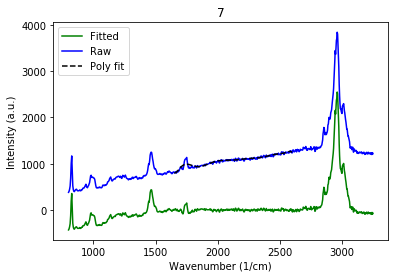

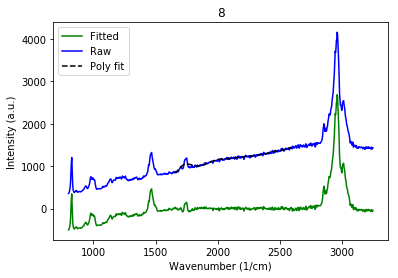

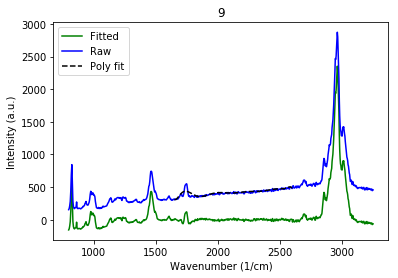

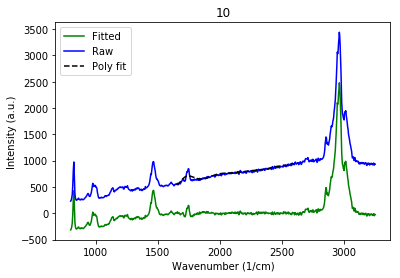

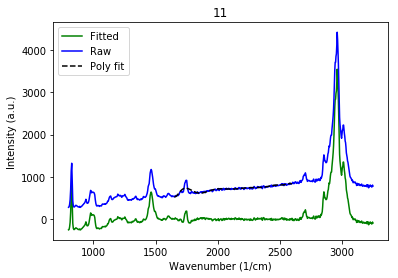

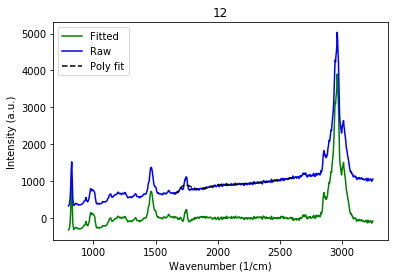

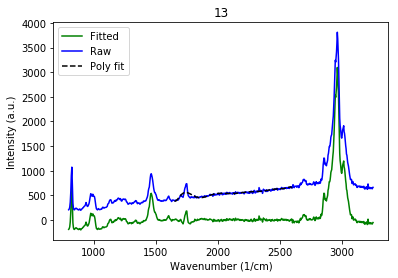

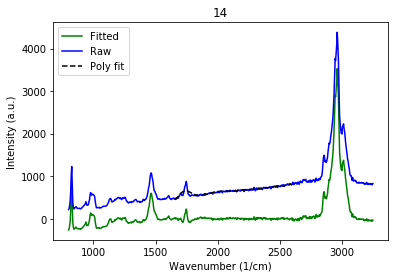

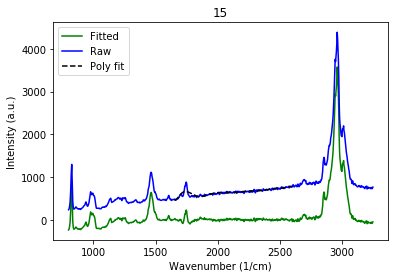

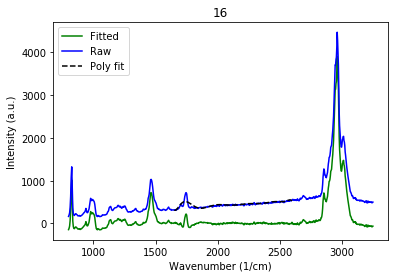

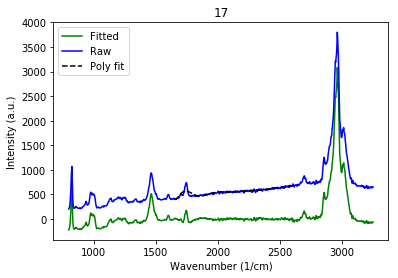

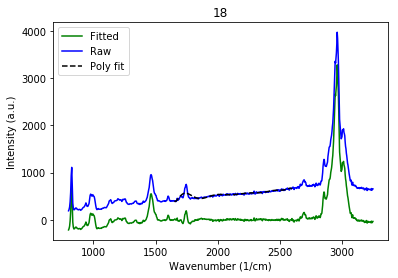

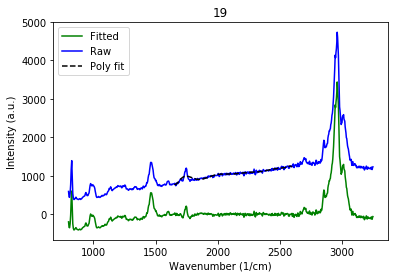

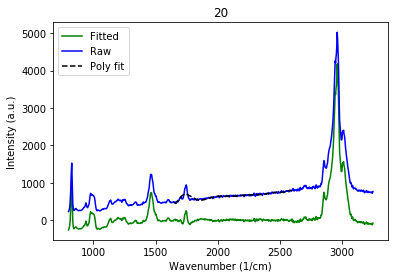

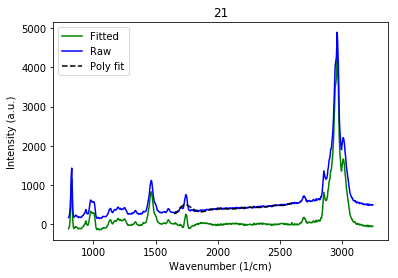

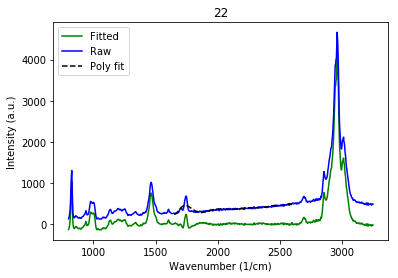

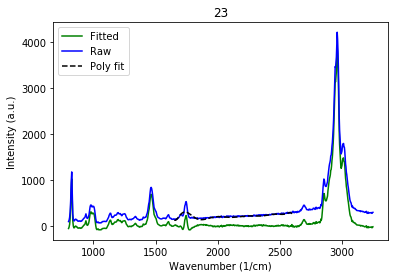

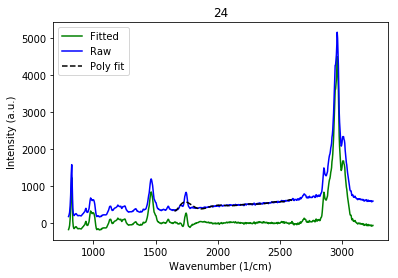

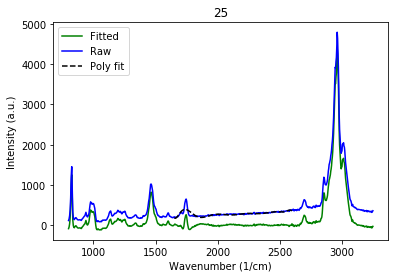

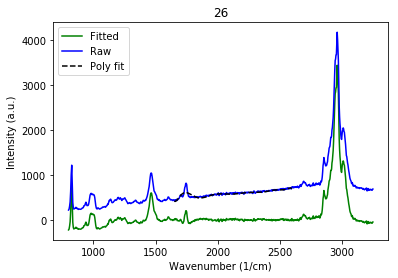

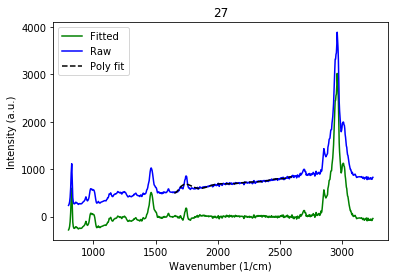

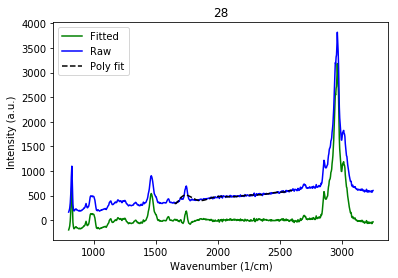

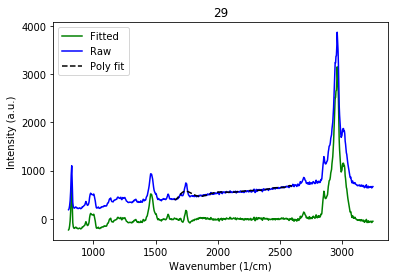

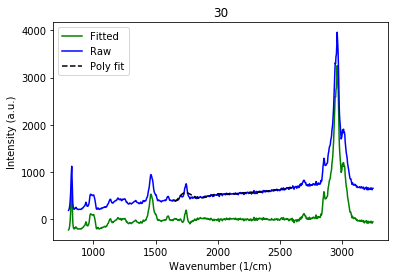

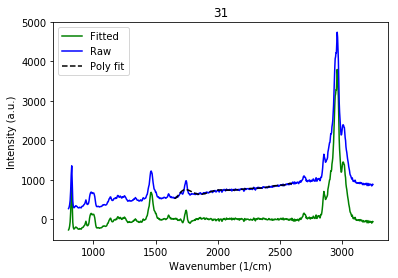

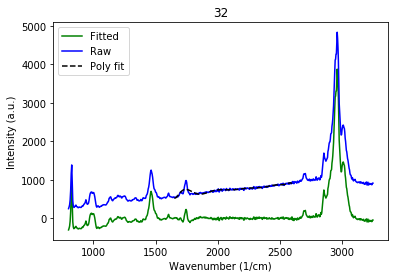

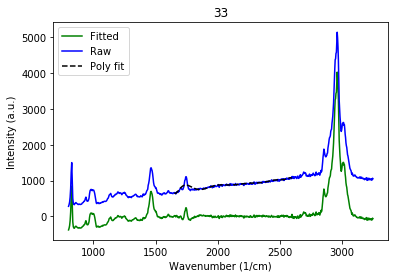

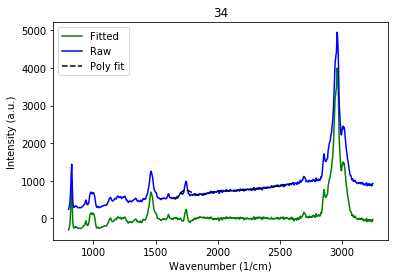

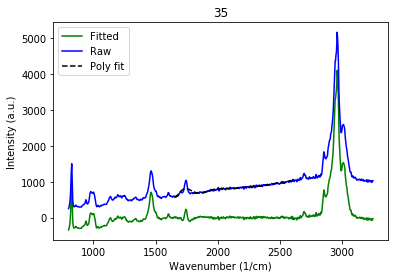

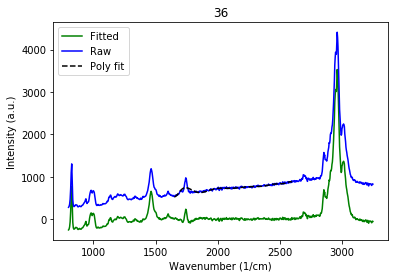

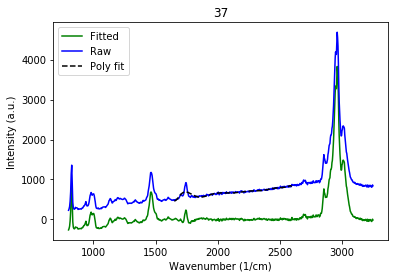

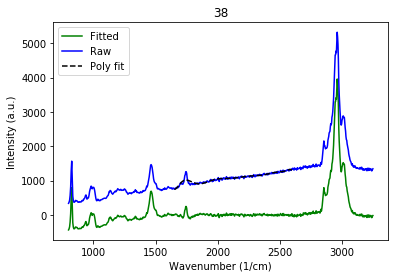

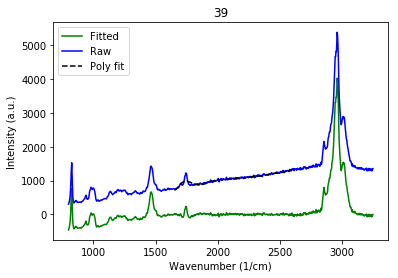

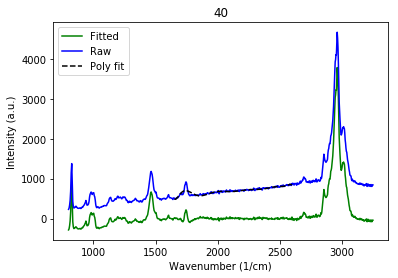

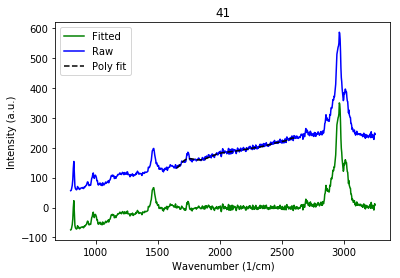

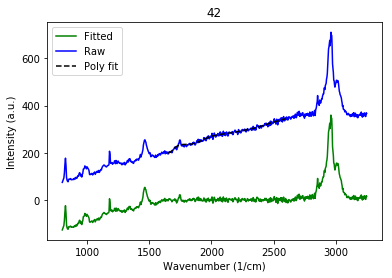

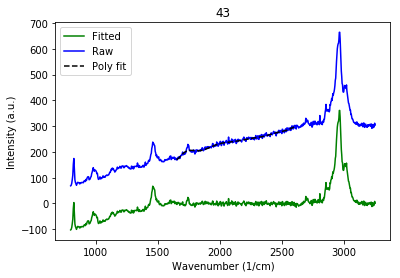

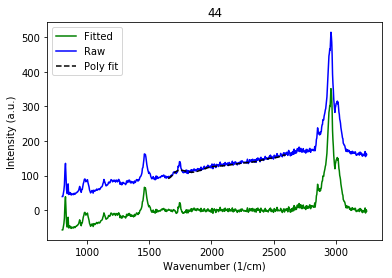

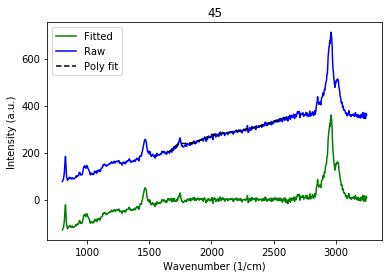

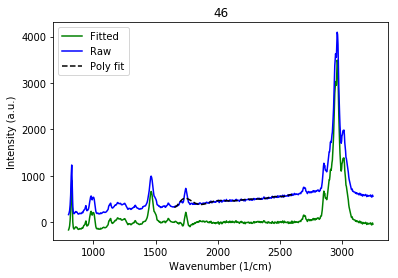

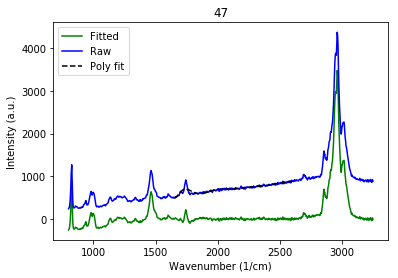

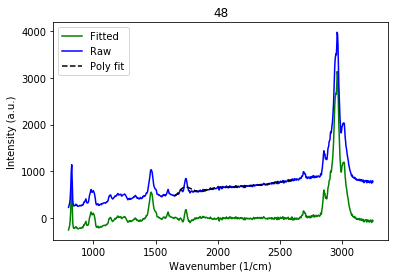

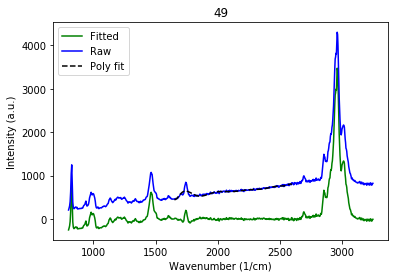

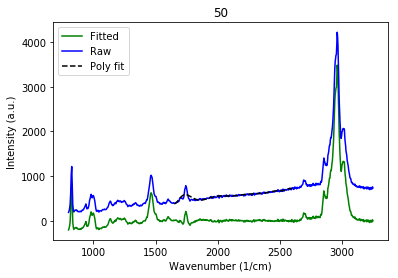

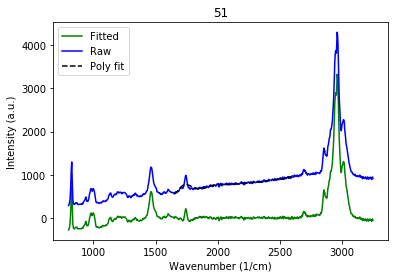

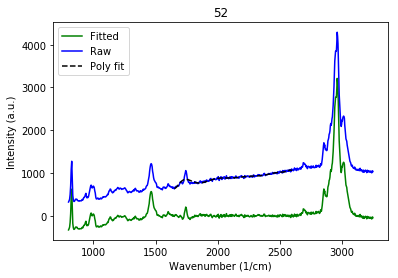

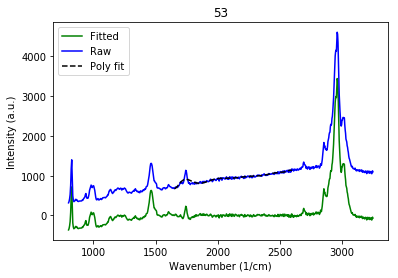

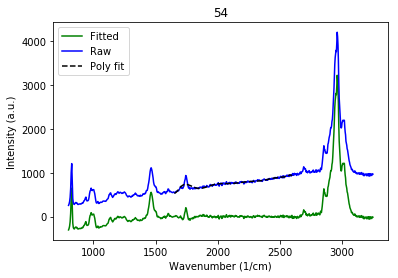

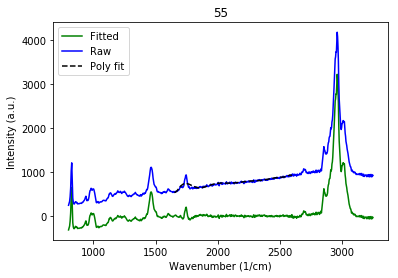

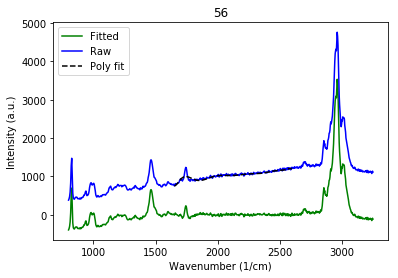

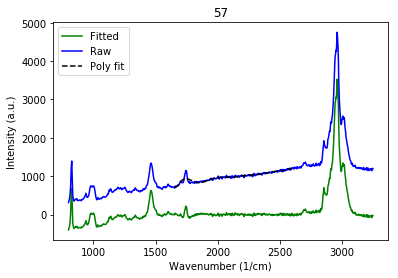

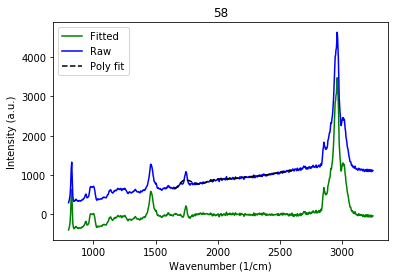

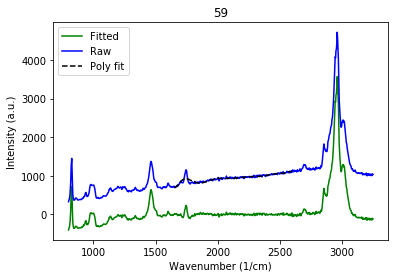

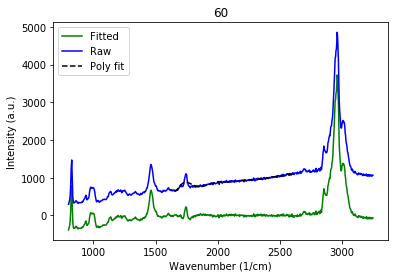

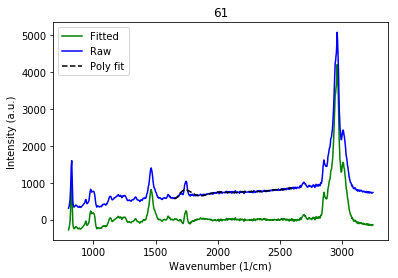

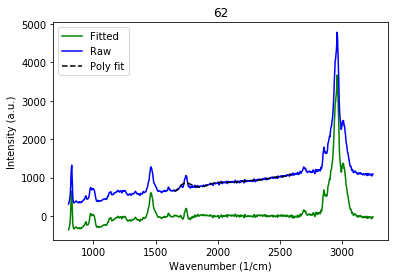

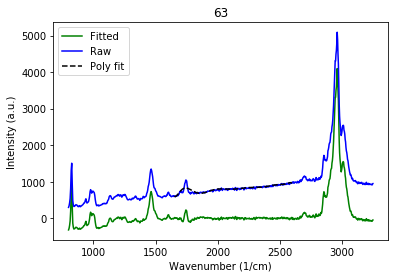

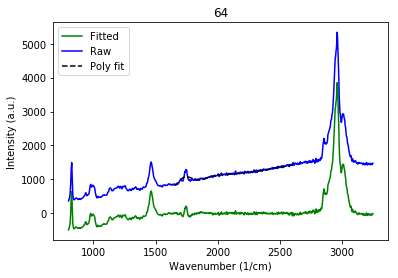

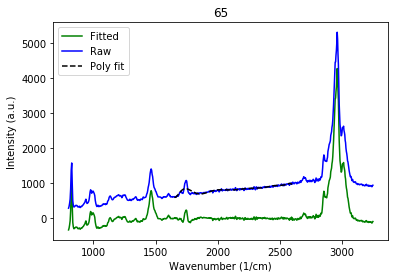

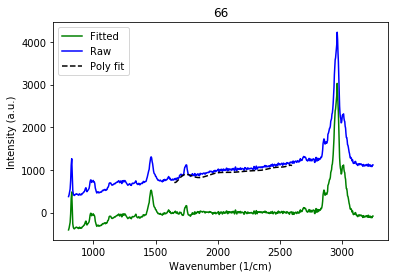

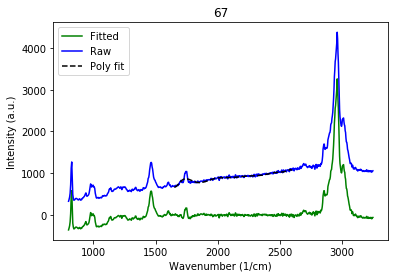

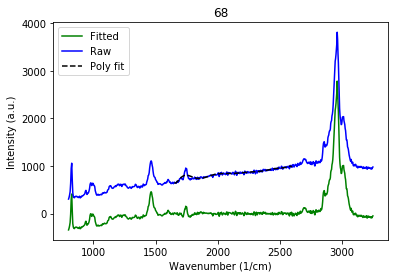

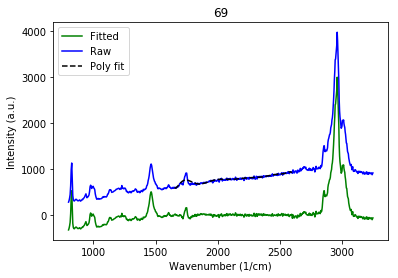

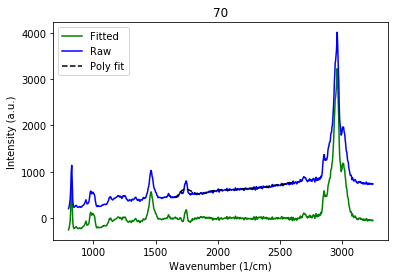

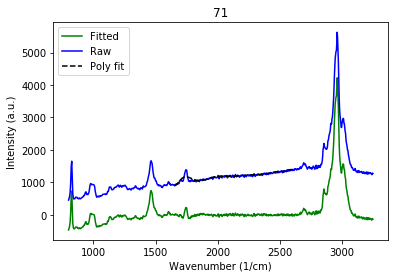

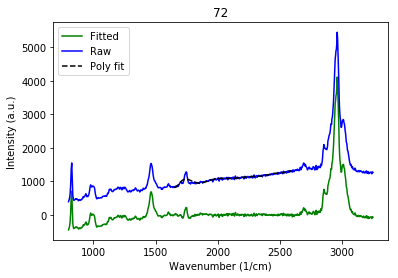

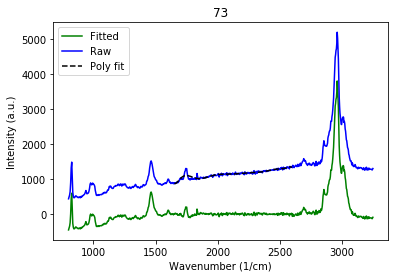

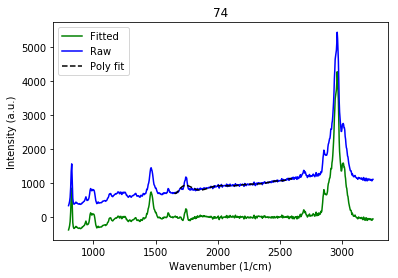

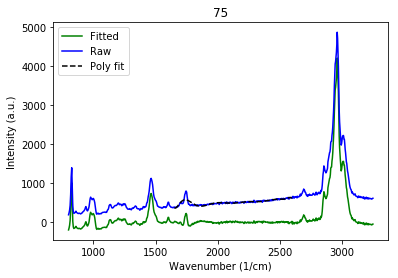

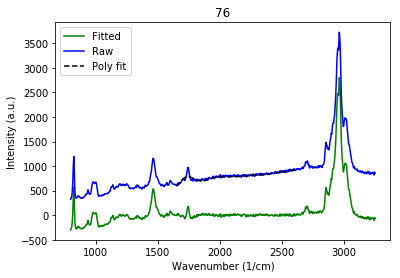

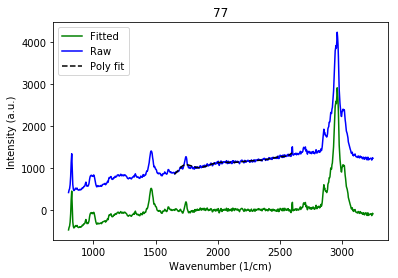

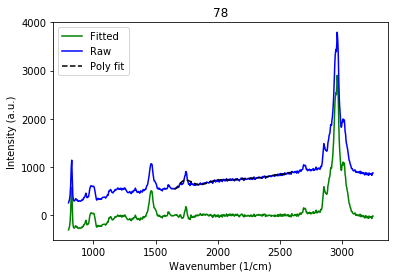

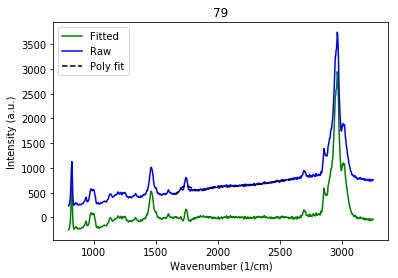

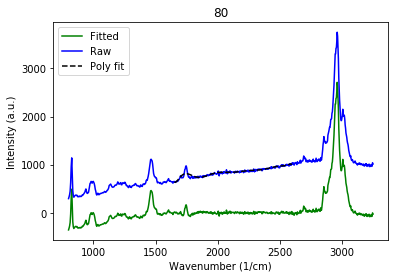

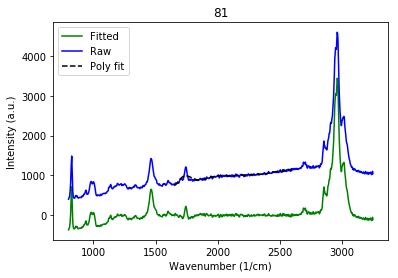

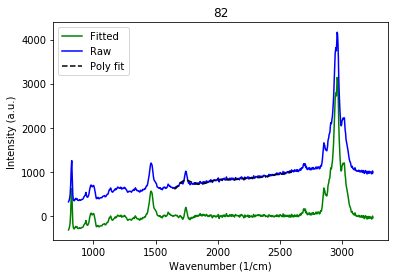

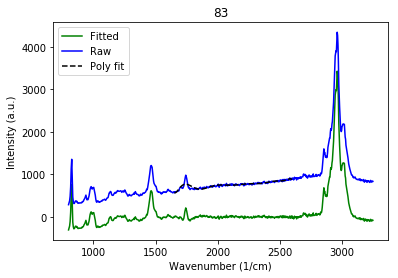

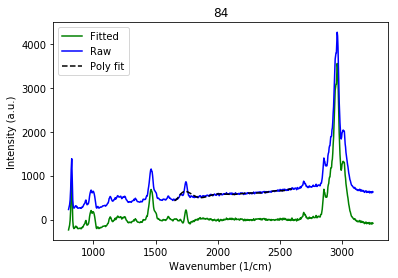

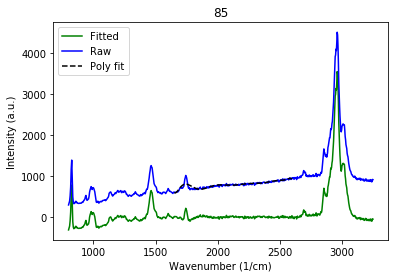

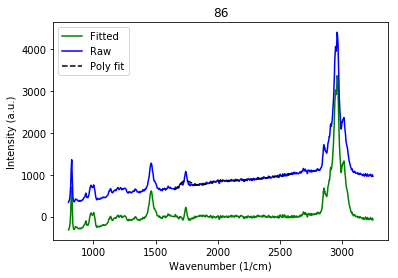

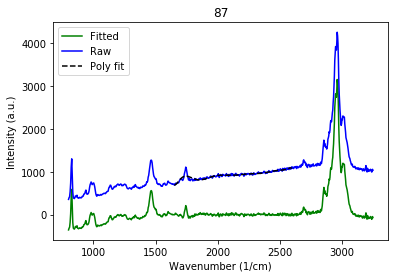

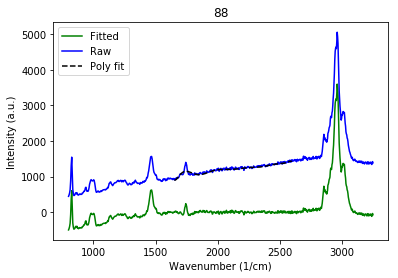

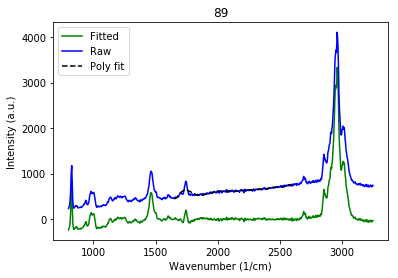

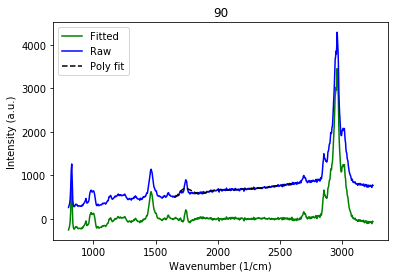

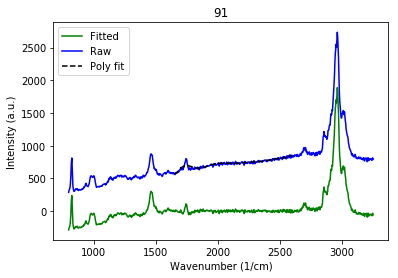

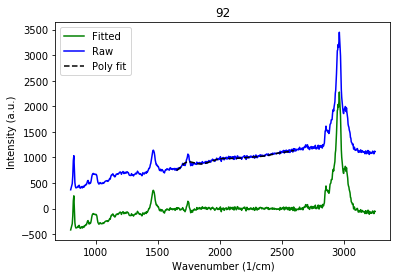

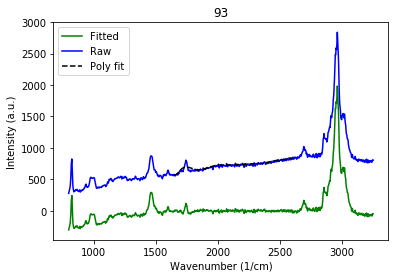

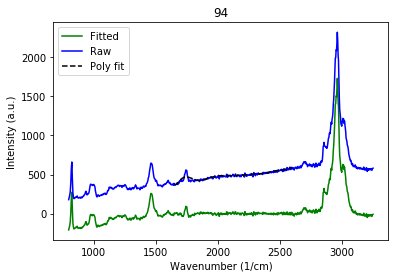

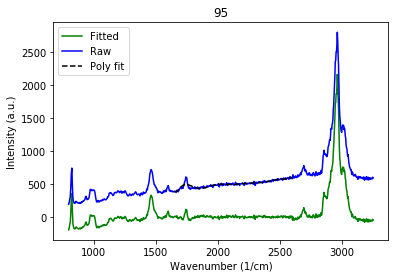

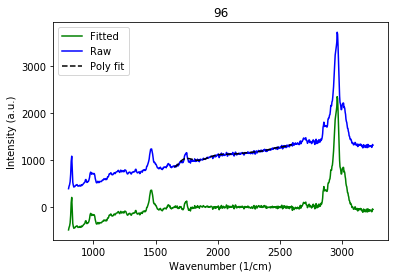

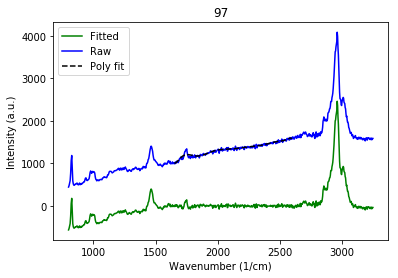

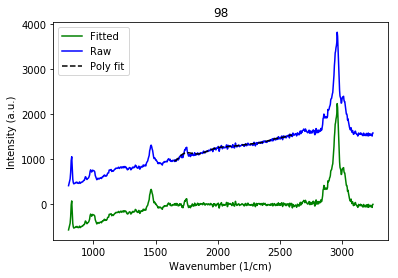

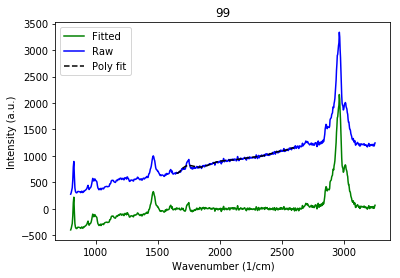

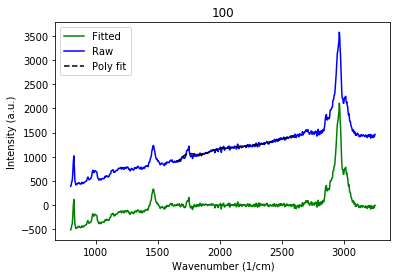

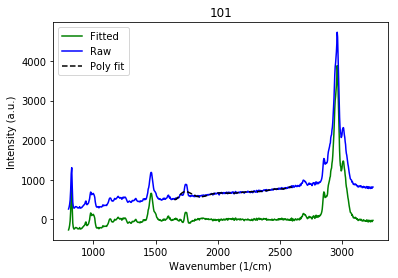

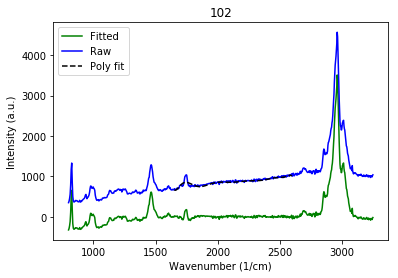

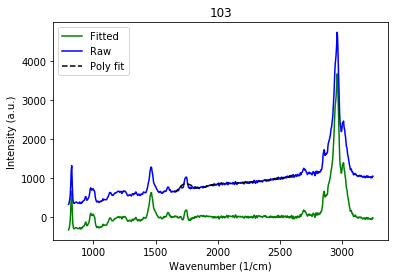

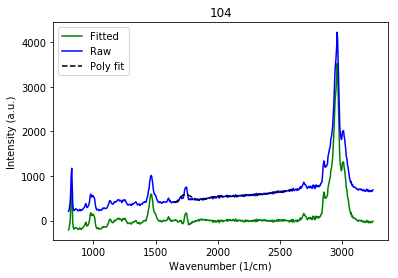

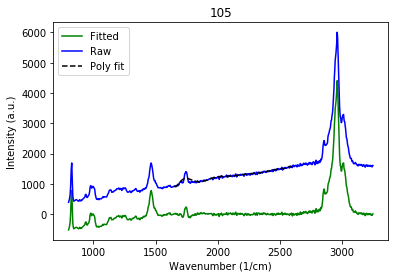

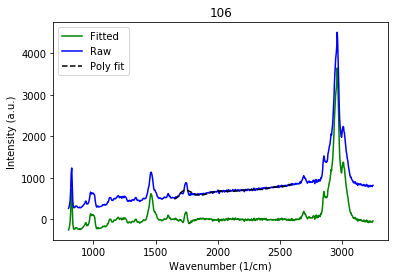

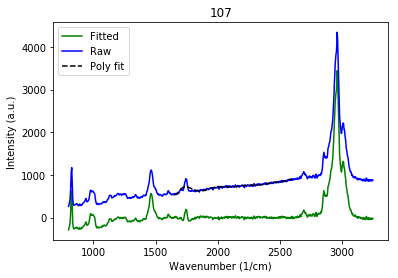

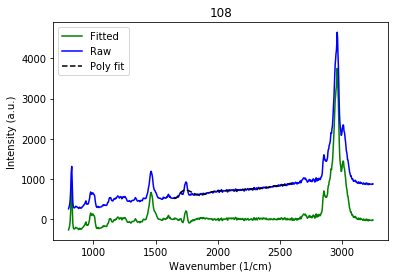

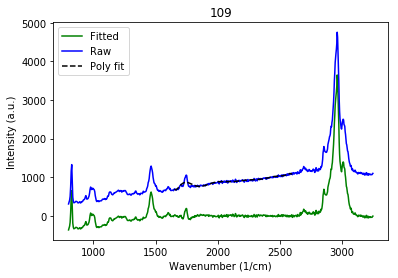

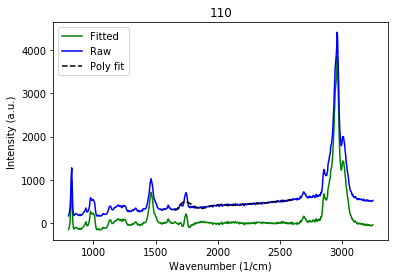

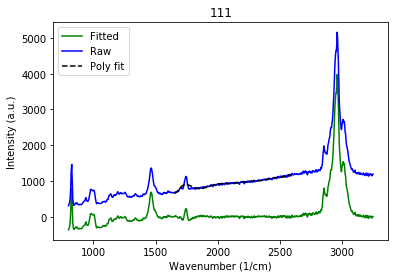

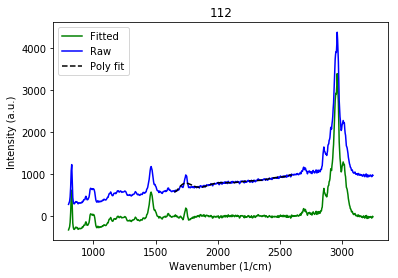

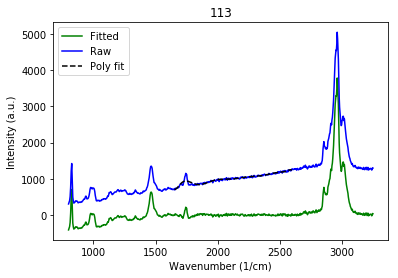

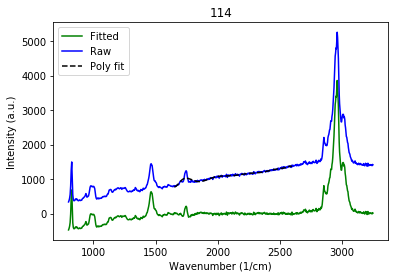

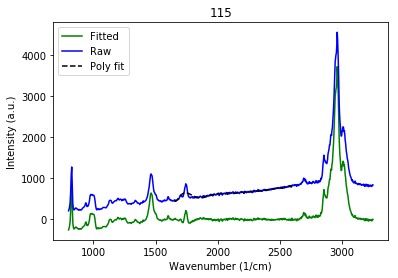

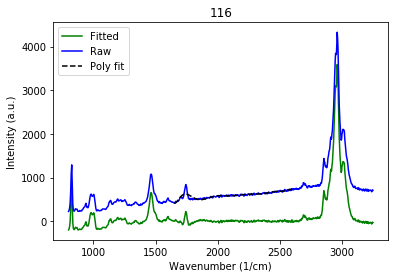

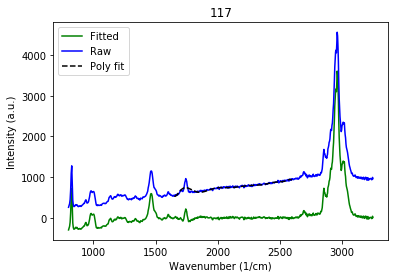

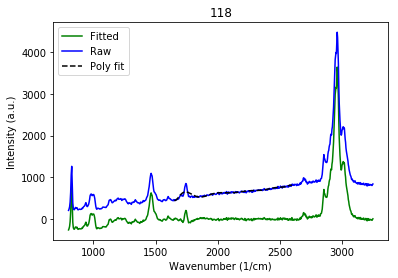

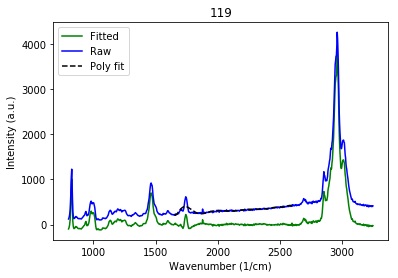

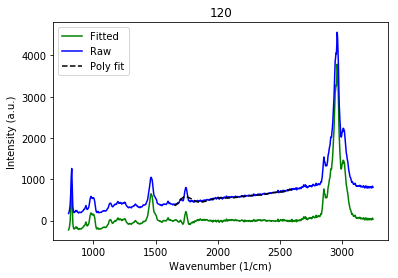

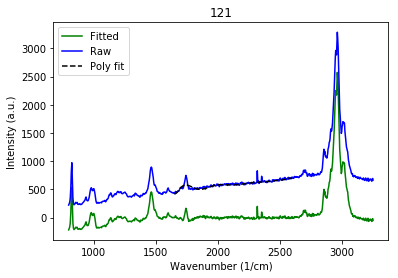

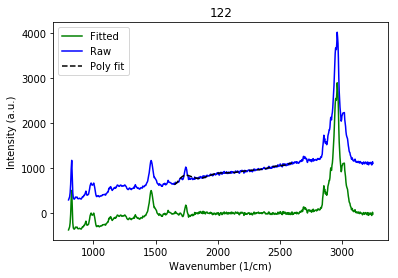

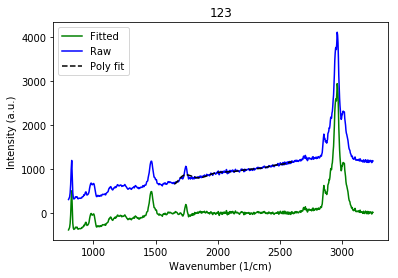

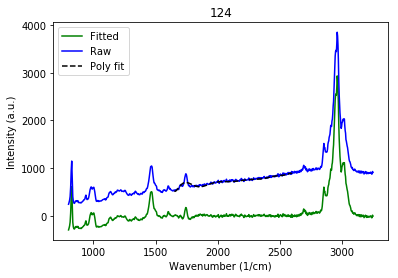

done


In [111]:
import numpy as np; import matplotlib.pyplot as plt; import pandas as pd; import warnings;
warnings.simplefilter('ignore', np.RankWarning)

# BACKGROUND SUBTRACTION
# Subtracts background without fitting individual peaks

%run bkg_fit.ipynb
%matplotlib inline
# Load spectrum
temperature='150'; sampNum='9'; samp='Gr_PMMA_'+temperature+'_';
path='/Users/ajcjake/Downloads/'+temperature+'/Popoff Graphene Coverage '+sampNum; 
#path='C:\\Users\\acarr\\Documents\\Data\\Raman\\2019_09_23\\';

for lt in range(0,124):
    a=np.genfromtxt(path+'/'+samp+str(lt+1)+'.txt', delimiter="\t");
    a=a[2:,:];
    # Split spectrum into x and y data. Subtract background offset. Eliminate negative x data
    x=a[:,0]; y=a[:,1]-a[0,1];

    idx1=np.argmax(x>800); idx2=np.argmax(x>3250);
    x=x[idx1:idx2]; y=y[idx1:idx2];

    # Initialize arrays for fitted and fixed y data
    sum_fitted_ydata=np.zeros_like(x); sum_fixed_ydata=y;

    idx3=np.where(x>1650)[0][0]; idx4=np.where(x>2600)[0][0];
    y_no_peak_bkg=sum_fixed_ydata[idx3:idx4];
    # Establish non-peak x data also using indices
    x_bkg=x[idx3:idx4];
    # Fit non-peak x and y data to a polynomial using n degrees. Subtract polynomial from fixed y data
    f=np.polyfit(x_bkg,y_no_peak_bkg,16); bkg_no_peak_poly=np.poly1d(f);
    fixed_no_peak_bkg=y_no_peak_bkg-bkg_no_peak_poly(x_bkg);

    sum_fixed_ydata[idx3:idx4]=fixed_no_peak_bkg
    sum_fixed_ydata[:idx3]=sum_fixed_ydata[:idx3]-sum_fixed_ydata[idx3-1];
    sum_fixed_ydata[idx4:]=sum_fixed_ydata[idx4:]-sum_fixed_ydata[idx4+1];
    
    plt.plot(x,sum_fixed_ydata,'-g',label='Fitted');
    plt.plot(a[idx1:idx2,0],a[idx1:idx2,1]-a[1,1],'-b',label='Raw');
    plt.plot(x_bkg,bkg_no_peak_poly(x_bkg),'--k',label='Poly fit');
    plt.legend();plt.xlabel('Wavenumber (1/cm)');plt.ylabel('Intensity (a.u.)');plt.title(str(lt+1));
    plt.show();

    file=path+'/'+samp+str(lt+1)+'_fixed.csv';
    temp=np.zeros((x.shape[0],2)); temp[:,0]=x; temp[:,1]=sum_fixed_ydata;
    np.savetxt(file,temp,delimiter=',');
print('done')